In [7]:
import torch
from torch import distributions as D

In [8]:
N_MIX = 4
N_DISTS = 5

In [9]:
params = torch.randint(1, 8, (N_MIX, N_DISTS, 2)).float()
#params = torch.tensor([[2, 2], [3, 2], [4, 2], [5, 2], [6, 2]]).float()
mix = torch.distributions.Categorical(torch.rand((N_MIX, N_DISTS)))
gammas = torch.distributions.Gamma(params[:,:,0], params[:,:,1])

mixture = torch.distributions.MixtureSameFamily(mix, gammas)

In [10]:
print(gammas.sample().shape, mix.sample().shape)

torch.Size([4, 5]) torch.Size([4])


torch.Size([200, 4])


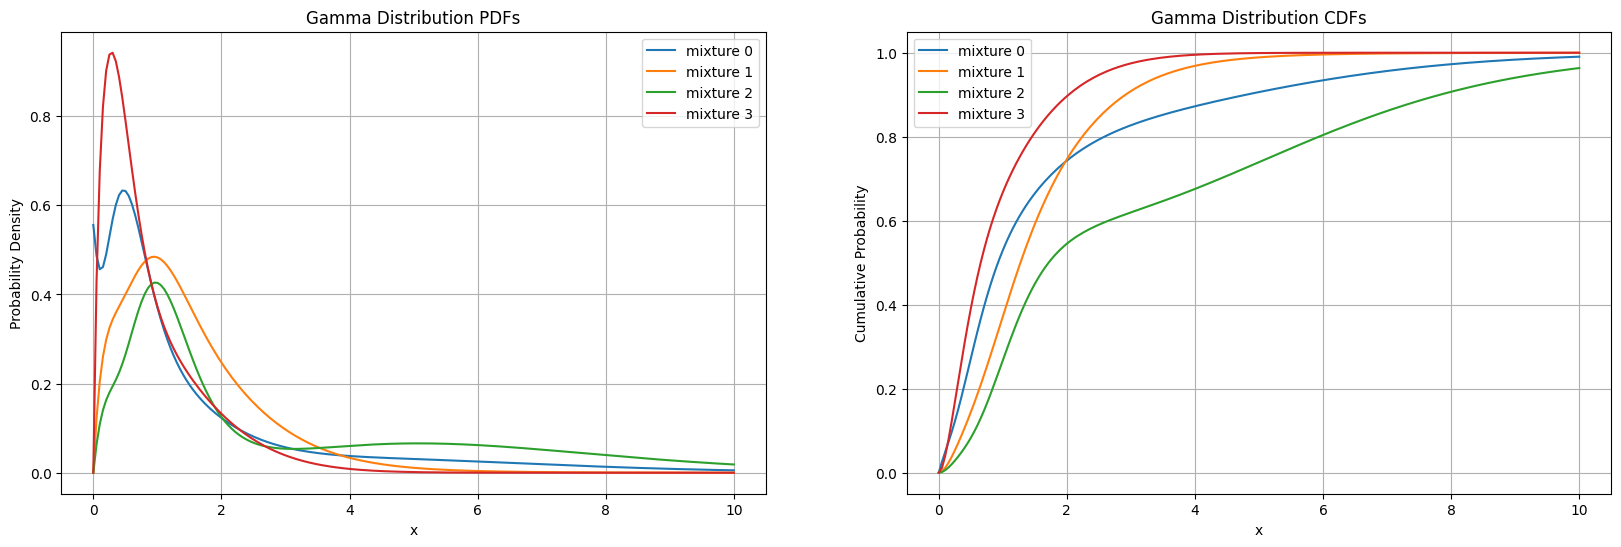

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = torch.linspace(0, 10, 200).view(-1, 1).repeat(1, N_MIX)
print(x.shape)
pdfs = mixture.log_prob(x).exp()
cdfs = mixture.cdf(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

for i in range(N_MIX):
    ax1.plot(x[:,i].numpy(), pdfs[:,i].numpy(), label=f'mixture {i}')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability Density')
ax1.set_title('Gamma Distribution PDFs')
ax1.legend()
ax1.grid(True)

for i in range(N_MIX):
    ax2.plot(x[:,i].numpy(), cdfs[:,i].numpy(), label=f'mixture {i}')
ax2.set_xlabel('x') 
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Gamma Distribution CDFs')
ax2.legend()
ax2.grid(True)

plt.show()
